# Importing required libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import axes3d
import matplotlib.animation as animation

# Creating Knot Coordinate Files

<IPython.core.display.Javascript object>


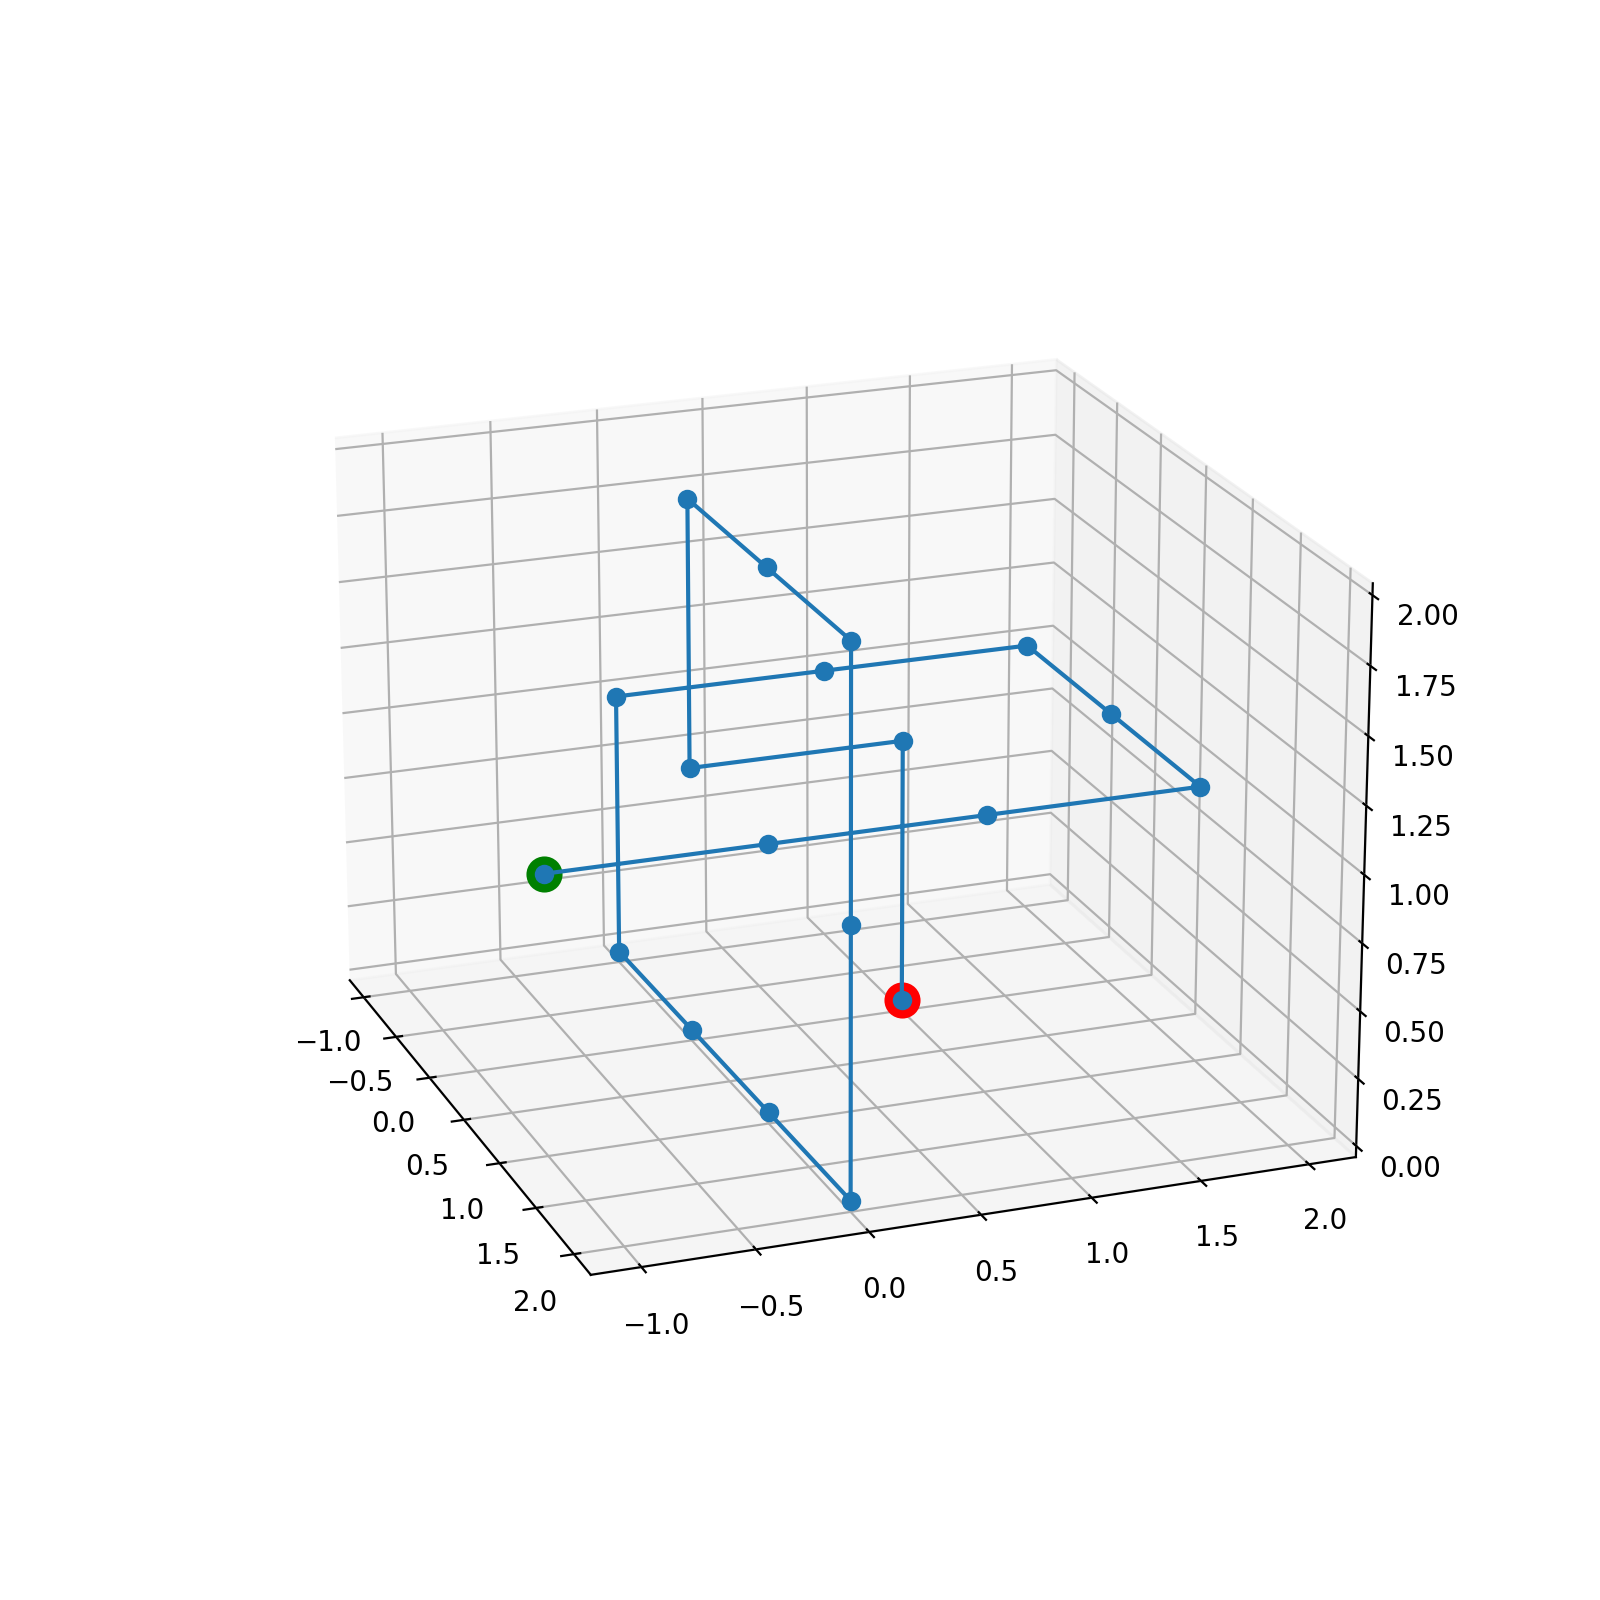

In [100]:
coords=np.loadtxt('trefoil_lattice.txt')
coords=np.delete(coords, [-1, -2, -3, -4, -5], 0)

first, last = coords[0], coords[-1]

%matplotlib notebook

fig=plt.figure(figsize=(8,8))
ax = fig.add_subplot(projection="3d")

ax.plot(coords[0, 0], coords[0, 1], coords[0, 2], 'o', color='green', ms=12)
ax.plot(coords[-1, 0], coords[-1, 1], coords[-1, 2], 'o', color='red', ms=12)
ax.plot(coords[:, 0], coords[:, 1], coords[:, 2], 'o-')

In [75]:
for i in range(10):
    first, last = coords[0], coords[-1]
    coords=np.insert(coords, 0, [first[0], first[1]-1.0, first[2]], axis=0)
    coords=np.insert(coords, len(coords), [last[0], last[1]+1.0, last[2]], axis=0)

for i in range(10):
    first, last = coords[0], coords[-1]
    coords=np.insert(coords, 0, [first[0], first[1], first[2]-1.0], axis=0)
    coords=np.insert(coords, len(coords), [last[0], last[1], last[2]-1.0], axis=0)
    
for i in range(20):
    first, last = coords[0], coords[-1]
    coords=np.insert(coords, 0, [first[0], first[1]-1.0, first[2]], axis=0)
    coords=np.insert(coords, len(coords), [last[0], last[1]+1.0, last[2]], axis=0)
    
coords*=(2)**(1/6)

<IPython.core.display.Javascript object>


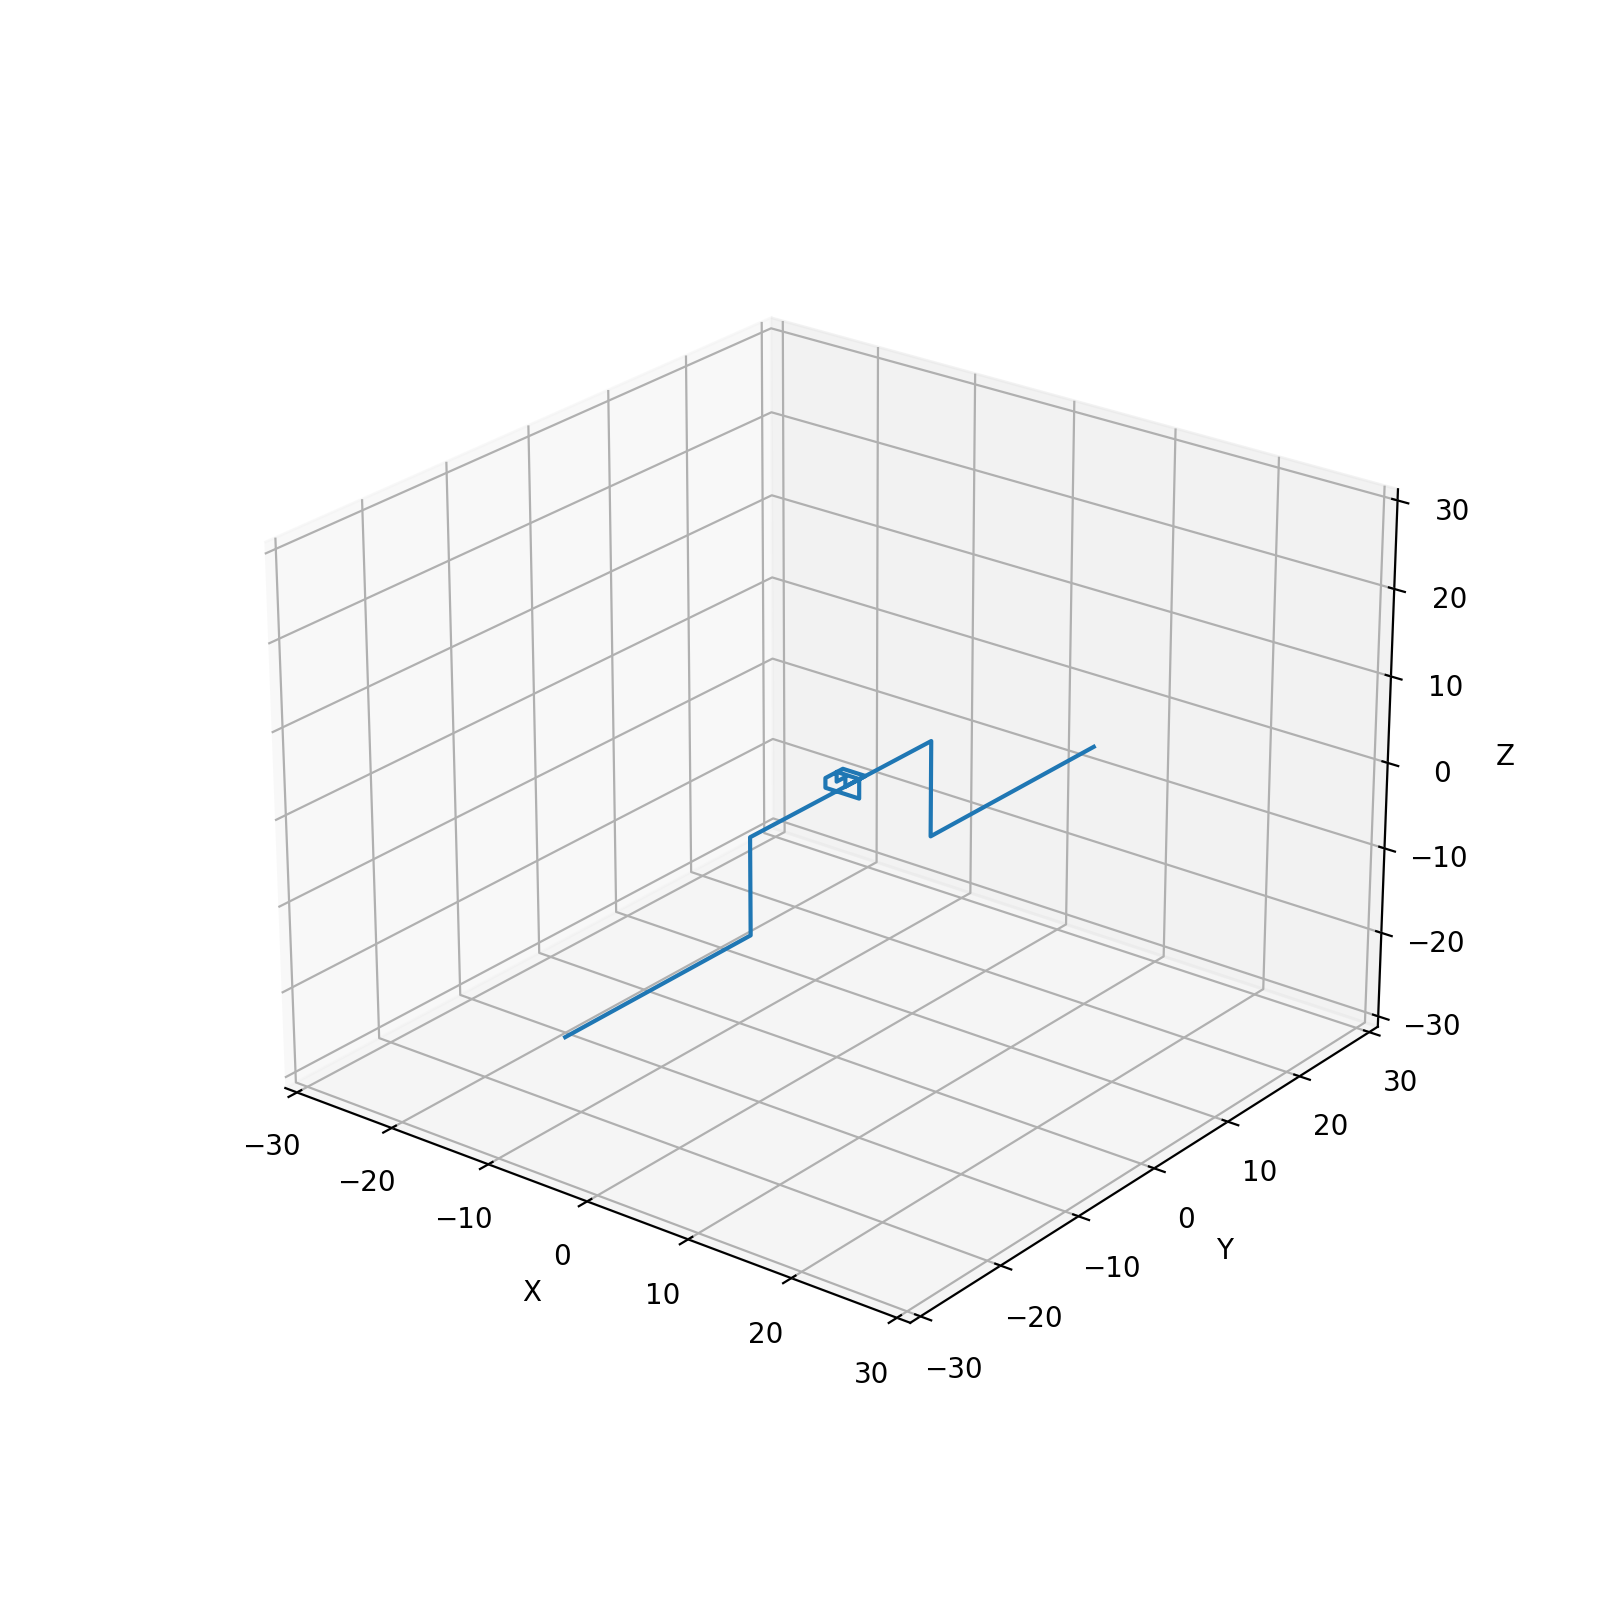

[(-30.0, 30.0), Text(0.5, 0, 'Z')]

In [99]:
%matplotlib notebook

fig=plt.figure(figsize=(8,8))
ax = fig.add_subplot(projection="3d")

ax.plot(coords[:, 0], coords[:, 1], coords[:, 2])
ax.set(xlim3d=(-30, 30), xlabel='X')
ax.set(ylim3d=(-30, 30), ylabel='Y')
ax.set(zlim3d=(-30, 30), zlabel='Z')

#np.savetxt('trefoil_short_loose.txt', coords, fmt='%13.3f')

In [96]:
test=np.loadtxt('knot_sim/trefoil_short_loose.txt')

for i in range(len(test)):
    for j in range(len(test)):
        flag=np.isclose(test[i], test[j]).all()
        if (flag) and (i != j):
            print(i, j)
        

# Reading, processing datafiles + making xyz file for VMD

In [2]:
def gen_data(filename, bp):
    with open(filename, 'r') as f:
        lines=f.readlines()
    lines=lines[bp+3:]
    lines=[x.strip() for x in lines]
    for idx, line in enumerate(lines):
        line=line.replace('-', ' -')
        temp=line.split()        
        if len(temp)==3:
            lines[idx]=[float(x) for x in temp]
    return lines

In [9]:
seed=np.random.randint(1,11)
print('seed is ', seed)
datafolder='/Users/souradeep/Coding/dnaknots/139bp/seed{}/'.format(seed)
moviedat=datafolder+'traj_0.000_0.240_139_dt0.005_topo_endfree.dat'
lines=gen_data(moviedat, 139)

xyzfile=open(datafolder+'seed{}.xyz'.format(seed), 'w')
xyzfile.write('139\n')
for line in lines:
    if 'continue' in line:
        xyzfile.write('139\n')
    elif type(line)==str:
        xyzfile.write('\n')
    else:
        line=[str(elem) for elem in line]
        line.insert(0, 'C')
        xyzfile.write('\t'.join(line))
        xyzfile.write('\n')    
xyzfile.close()

seed is  10


### This simulation has 139 beads, stuck between two walls situated on two XZ-planes. There are a total of 10000 frames (~ 10^7 timesteps of evolution).

# Plotting the animation

<IPython.core.display.Javascript object>


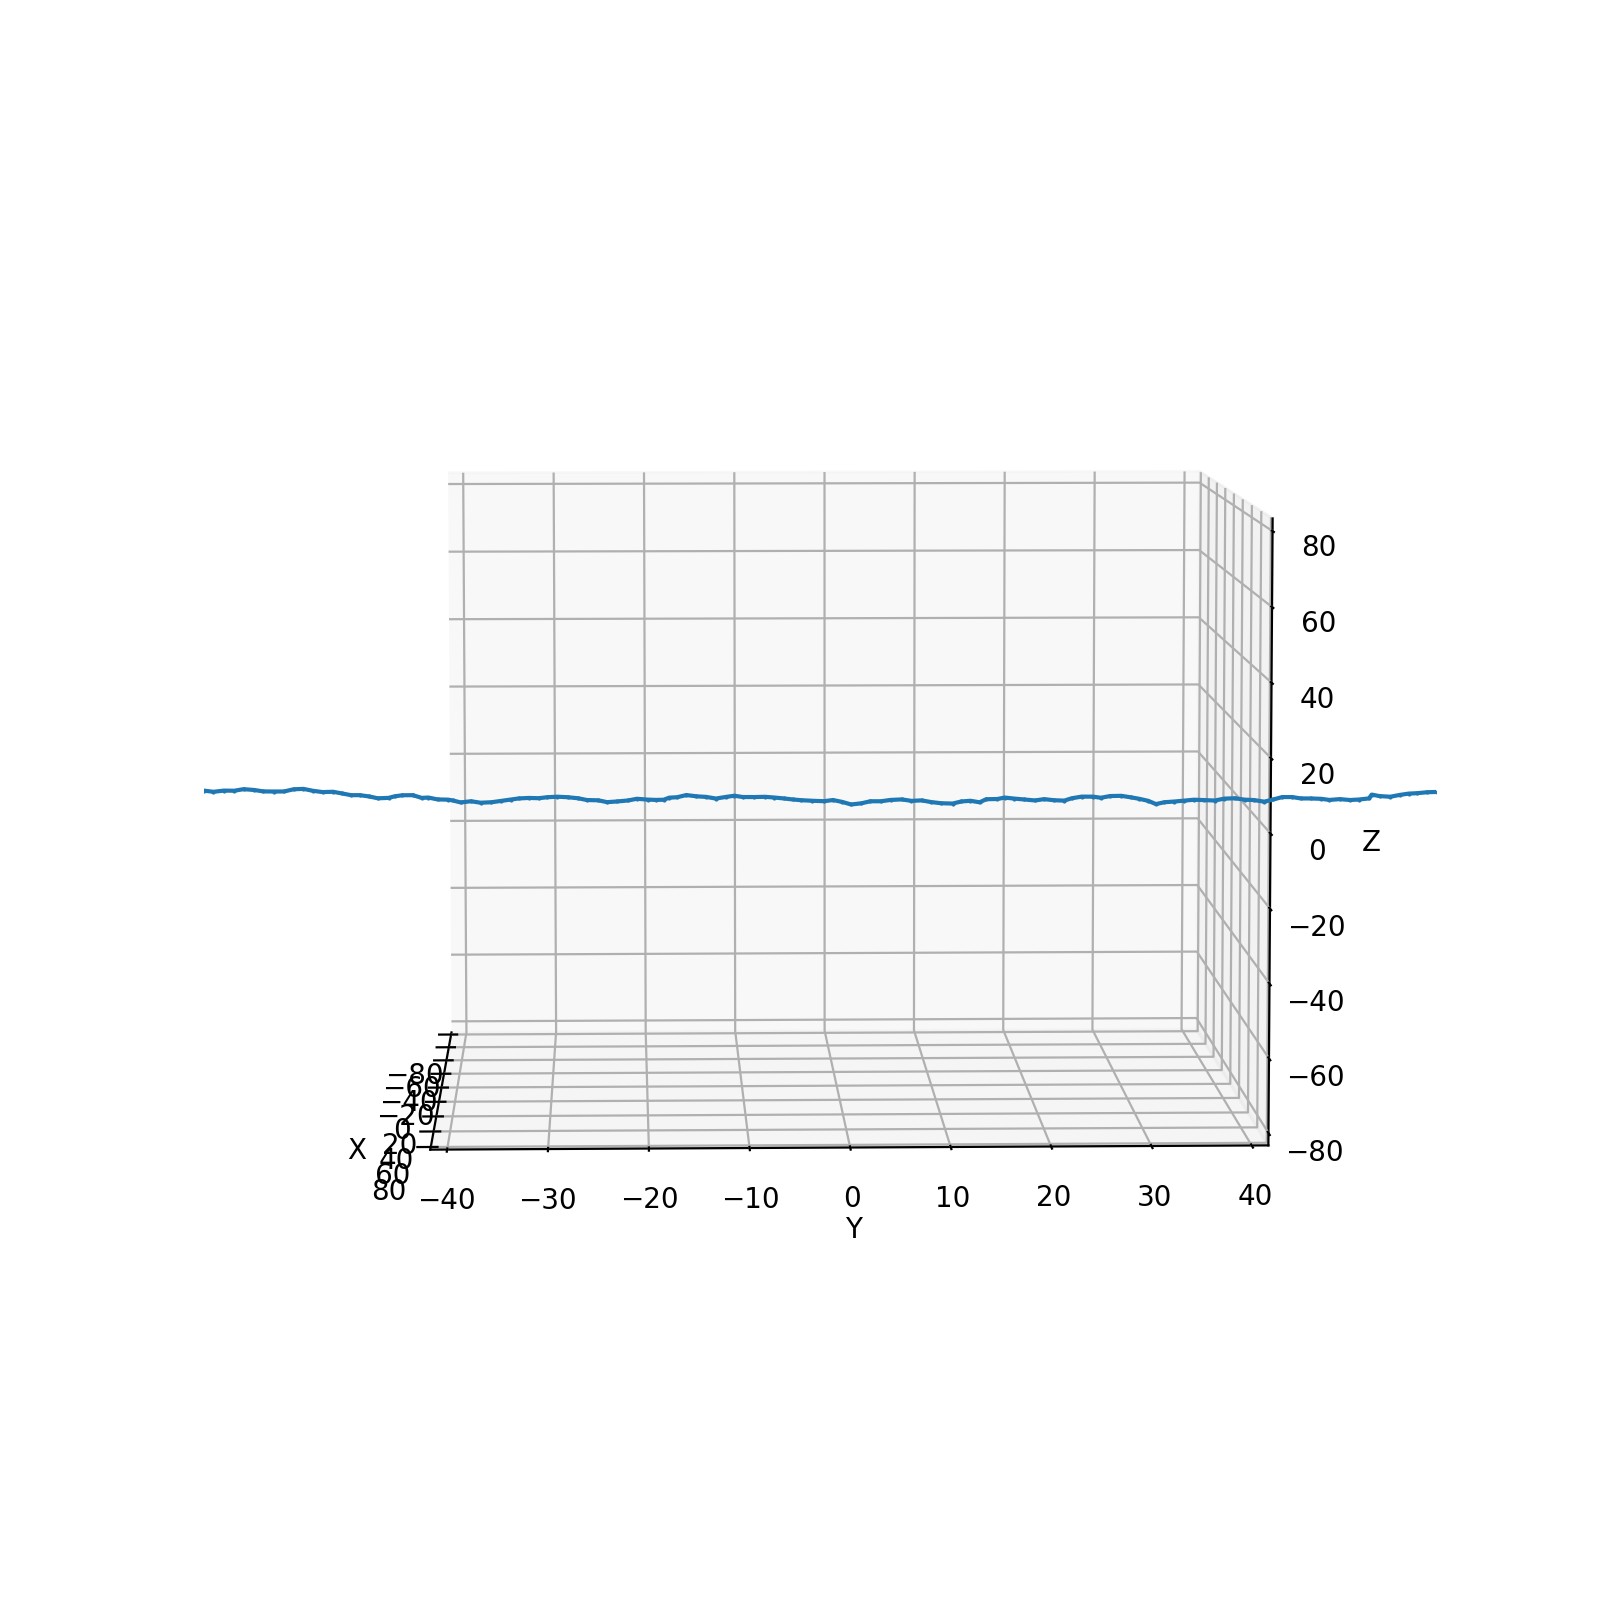

In [18]:
%matplotlib notebook

def update_coords(i, lines, line):
    iters=1000
    bp=139
    elem=str(iters*(i+1))
    idx=lines.index(elem)+1
    piece=np.array(lines[idx:idx+bp])
    line.set_data(piece[:, 0], piece[:, 1])
    line.set_3d_properties(piece[:, 2])
    line.set_linestyle('-')
    line.set_marker('o')
    line.set_markersize(0.5)
    return line

fig=plt.figure(figsize=(8,8))
ax = fig.add_subplot(projection="3d")

line=ax.plot([], [], [])[0]
ax.set(xlim3d=(-80, 80), xlabel='X')
ax.set(ylim3d=(-40, 40), ylabel='Y')
ax.set(zlim3d=(-80, 80), zlabel='Z')
#above three lines sets the limits on x, y, z coordinates visualized. 
ax.view_init(15, -15)
#this line sets the initial angle of viewing, two parameters are elevation angle and azimuthal angle. 

ani = animation.FuncAnimation(
    fig, update_coords, frames=1500, fargs=(lines, line), interval=30)
# Frames = total number of frames to plot, interval = time interval between two frames in ms
#change as required

#ani.save('knot_dna_long.mp4', fps=2, extra_args=['-vcodec', 'libx264'])
#above line if uncommented renders a video of the simulation

plt.show()

# Scanning to Locate and Track the Knot